<strong>Цветков Сергей</strong>

Домашнее задание 2. Пример визуального анализа данных по оттоку клиентов телеком-оператора. 
Провести визуальный анализ данных по аналогии с Lesson2_1.
Вам необходимо поместить в основной каталог юпитера этот файл и файл с данными telecom_churn.csv.
В пустые ячейки необходимо ввести код программы, ввыполнить его и получить результат в соответствии с заданием.
После выполнения всех заданий, дополнительно, сохраняем тетрадь юпитера в pdf формате.
Для этого шелкаем правой кнопкой и в меню выбираем "Сохранить страницу как", вводим имя файла и выбираем формат pdf.
Отчет будет включать два файла.
Файл юпитера для проверки.
Файл в формате pdf для цифрового следа.

Подготовим платформу

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Загружаем данные и проверяем их размер

In [11]:
df = pd.read_csv('telecom_churn.csv')
df.shape

(3333, 20)

В загруженной таблице 3333 строки и 20 столбцов

Проверяем пропуски в записях

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Пропусков - нет, везде по 3333 записи

Проверяем загруженные данные - смотрим первые десять строк

In [14]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


Каждая строка в таблице представляет собой одного клиента – это объект исследования. Столбцы – признаки объекта.

<h4>Описание признаков</h4>
<table>
<thead>
<tr>
<th>Название</th>
<th>Описание</th>
<th>Тип</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>State</strong></td>
<td>Буквенный код штата</td>
<td>номинальный</td>
</tr>
<tr>
<td><strong>Account length</strong></td>
<td>Как долго клиент обслуживается компанией</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Area code</strong></td>
<td>Префикс номера телефона</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>International plan</strong></td>
<td>Международный роуминг (подключен/не подключен)</td>
<td>бинарный</td>
</tr>
<tr>
<td><strong>Voice mail plan</strong></td>
<td>Голосовая почта (подключена/не подключена)</td>
<td>бинарный</td>
</tr>
<tr>
<td><strong>Number vmail messages</strong></td>
<td>Количество голосовых сообщений</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day minutes</strong></td>
<td>Общая длительность разговоров днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day calls</strong></td>
<td>Общее количество звонков днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day charge</strong></td>
<td>Общая сумма оплаты за услуги днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve minutes</strong></td>
<td>Общая длительность разговоров вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve calls</strong></td>
<td>Общее количество звонков вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve charge</strong></td>
<td>Общая сумма оплаты за услуги вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night minutes</strong></td>
<td>Общая длительность разговоров ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night calls</strong></td>
<td>Общее количество звонков ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night charge</strong></td>
<td>Общая сумма оплаты за услуги ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl minutes</strong></td>
<td>Общая длительность международных разговоров</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl calls</strong></td>
<td>Общее количество международных разговоров</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl charge</strong></td>
<td>Общая сумма оплаты за международные разговоры</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Customer service calls</strong></td>
<td>Число обращений в сервисный центр</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Churn (Целевая переменная)</strong></td>
<td>Признак оттока клиентов (1 - потеря клиента)</td>
<td>бинарный</td>
</tr>    
</tbody>
</table>

In [15]:
# Определяем разпределение оттока клиентов
df['Churn'].value_counts() # Подсчет количества каждого вида значений в колонка

False    2850
True      483
Name: Churn, dtype: int64

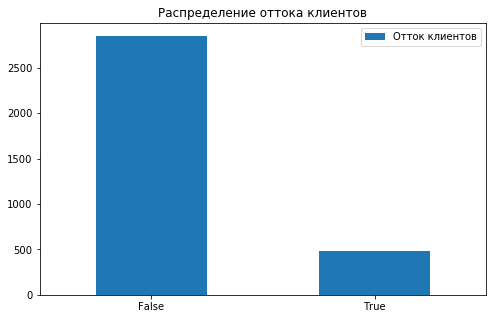

In [21]:
# Выводим распределение оттока клиентов
df['Churn'].value_counts().plot(kind='bar', label='Отток клиентов', rot=0) # rot=0 - поворот подписи данных
plt.legend()
plt.title('Распределение оттока клиентов');

<p>Выделим следующие группы признаков (среди всех кроме Churn ):</p>
<ul>
<li>бинарные: International plan, Voice mail plan</li>
<li>категориальные: State</li>
<li>порядковые: Customer service calls</li>
<li>количественные: все остальные</li>
</ul>
<p>Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.</p>

In [22]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()

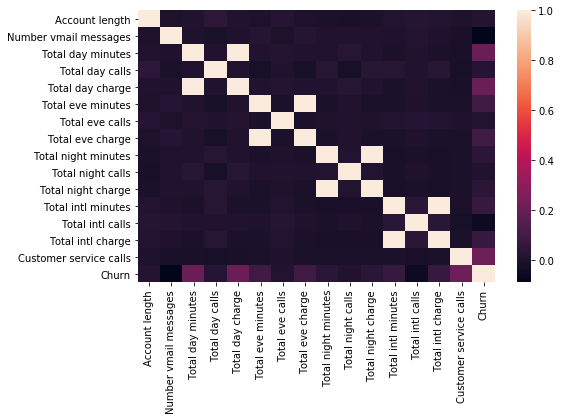

In [24]:
sns.heatmap(corr_matrix);

Теперь посмотрим на распределения всех интересующих нас количественных признаков. На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

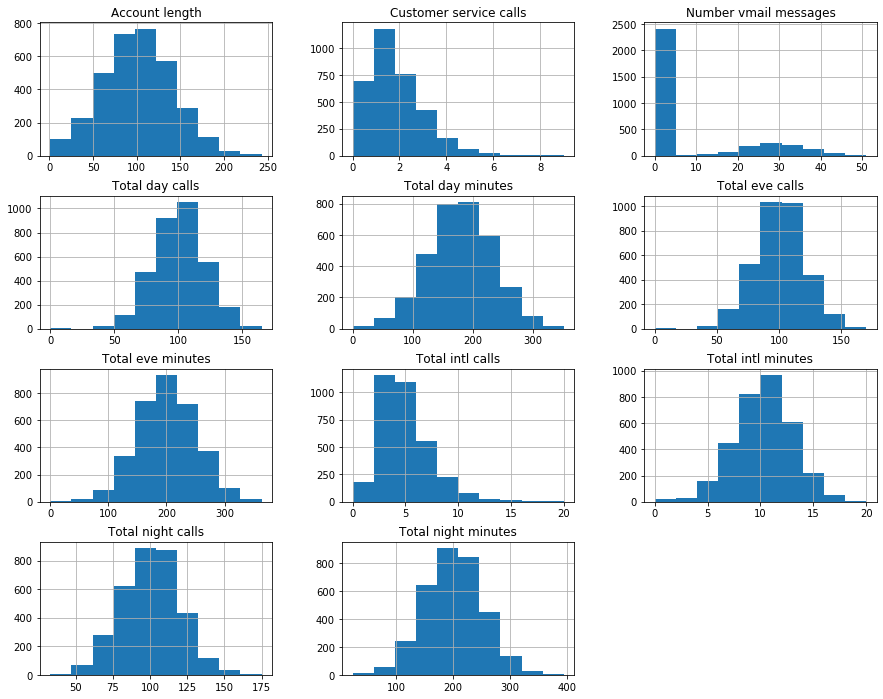

In [27]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(15,12));